In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Desactivar las advertencias relacionadas con el ajuste del diseño de la figura
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

# Definir los colores deseados
colors = {'Female': 'pink', 'Male': 'navy'}

In [2]:
import pandas as pd

# Carga el conjunto de datos con el tipo de datos especificado
multiple_choice_responses = pd.read_csv("Dataset/kaggle-survey-2019/multiple_choice_responses.csv", low_memory=False)
other_text_responses = pd.read_csv("Dataset/kaggle-survey-2019/other_text_responses.csv")
questions_only = pd.read_csv("Dataset/kaggle-survey-2019/questions_only.csv")
survey_schema = pd.read_csv("Dataset/kaggle-survey-2019/survey_schema.csv")

#Muestra las columnas de todas las tablas
print("1. multiple_choice_responses: ", multiple_choice_responses.columns) 
print("2. other_text_responses: ", other_text_responses.columns)
print("3. questions_only: ", questions_only.columns)
print("4. survey_schema: ", survey_schema.columns)

1. multiple_choice_responses:  Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q2_OTHER_TEXT',
       'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6', 'Q7',
       ...
       'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7', 'Q34_Part_8',
       'Q34_Part_9', 'Q34_Part_10', 'Q34_Part_11', 'Q34_Part_12',
       'Q34_OTHER_TEXT'],
      dtype='object', length=246)
2. other_text_responses:  Index(['Q12_OTHER_TEXT', 'Q13_OTHER_TEXT', 'Q14_OTHER_TEXT', 'Q14_Part_1_TEXT',
       'Q14_Part_2_TEXT', 'Q14_Part_3_TEXT', 'Q14_Part_4_TEXT',
       'Q14_Part_5_TEXT', 'Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT',
       'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q24_OTHER_TEXT',
       'Q25_OTHER_TEXT', 'Q26_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT',
       'Q29_OTHER_TEXT', 'Q2_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT',
       'Q32_OTHER_TEXT', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT', 'Q5_OTHER_TEXT',
       'Q9_OTHER_TEXT'],
      dtype='object')
3. questions_on

In [3]:
#print(other_text_responses.head())

v_uniq = other_text_responses.apply(lambda col: col.unique())
v_uniq

#other_text_responses['Q13_OTHER_TEXT'].unique()

Q12_OTHER_TEXT     [Who/what are your favorite media sources that...
Q13_OTHER_TEXT     [On which platforms have you begun or complete...
Q14_OTHER_TEXT     [What is the primary tool that you use at work...
Q14_Part_1_TEXT    [What is the primary tool that you use at work...
Q14_Part_2_TEXT    [What is the primary tool that you use at work...
Q14_Part_3_TEXT    [What is the primary tool that you use at work...
Q14_Part_4_TEXT    [What is the primary tool that you use at work...
Q14_Part_5_TEXT    [What is the primary tool that you use at work...
Q16_OTHER_TEXT     [Which of the following integrated development...
Q17_OTHER_TEXT     [Which of the following hosted notebook produc...
Q18_OTHER_TEXT     [What programming languages do you use on a re...
Q19_OTHER_TEXT     [What programming language would you recommend...
Q20_OTHER_TEXT     [What data visualization libraries or tools do...
Q21_OTHER_TEXT     [Which types of specialized hardware do you us...
Q24_OTHER_TEXT     [Which of the f

In [4]:
#print(questions_only.head())

from IPython.display import Markdown, display
for index, value in questions_only.iloc[0].items():
    display(Markdown(f'**{index}:** {value}'))

**Time from Start to Finish (seconds):** Duration (in seconds)

**Q1:** What is your age (# years)?

**Q2:** What is your gender? - Selected Choice

**Q3:** In which country do you currently reside?

**Q4:** What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

**Q5:** Select the title most similar to your current role (or most recent title if retired): - Selected Choice

**Q6:** What is the size of the company where you are employed?

**Q7:** Approximately how many individuals are responsible for data science workloads at your place of business?

**Q8:** Does your current employer incorporate machine learning methods into their business?

**Q9:** Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice

**Q10:** What is your current yearly compensation (approximate $USD)?

**Q11:** Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?

**Q12:** Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice

**Q13:** On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice

**Q14:** What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice

**Q15:** How long have you been writing code to analyze data (at work or at school)?

**Q16:** Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q17:** Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q18:** What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice

**Q19:** What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice

**Q20:** What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q21:** Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q22:** Have you ever used a TPU (tensor processing unit)?

**Q23:** For how many years have you used machine learning methods?

**Q24:** Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice

**Q25:** Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q26:** Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q27:** Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q28:** Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice

**Q29:** Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice

**Q30:** Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice

**Q31:** Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice

**Q32:** Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice

**Q33:** Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice

**Q34:** Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice

In [5]:
survey_schema.head()

,2019 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q31,Q32,Q33,Q34,Q4,Q5,Q6,Q7,Q8,Q9
0,Question:,What is your age (# years)?,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,What is the primary tool that you use at work ...,How long have you been writing code to analyze...,Which of the following integrated development ...,Which of the following hosted notebook product...,...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...
1,# of Respondents:,19717,12497,12250,16781,16569,15690,15627,14627,14443,...,7078,7050,7015,6994,19323,19107,14002,13623,13227,9226
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selected,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,If Select the title most similar to your curre...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


In [6]:
#print("Information of multiple_choice_responses:")
#multiple_choice_responses.info()

v_uniq = multiple_choice_responses.apply(lambda col: col.unique())
v_uniq

Time from Start to Finish (seconds)    [Duration (in seconds), 510, 423, 83, 391, 392...
Q1                                     [What is your age (# years)?, 22-24, 40-44, 55...
Q2                                     [What is your gender? - Selected Choice, Male,...
Q2_OTHER_TEXT                          [What is your gender? - Prefer to self-describ...
Q3                                     [In which country do you currently reside?, Fr...
                                                             ...                        
Q34_Part_9                             [Which of the following relational database pr...
Q34_Part_10                            [Which of the following relational database pr...
Q34_Part_11                            [Which of the following relational database pr...
Q34_Part_12                            [Which of the following relational database pr...
Q34_OTHER_TEXT                         [Which of the following relational database pr...
Length: 246, dtype: o

In [7]:
print("First few rows of multiple_choice_responses:")
multiple_choice_responses.head()


First few rows of multiple_choice_responses:


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [8]:
print("Dimensions of multiple_choice_responses:", )
multiple_choice_responses.shape

Dimensions of multiple_choice_responses:


(19718, 246)

In [9]:
print("Columns of multiple_choice_responses:")
multiple_choice_responses.columns

Columns of multiple_choice_responses:


Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q2_OTHER_TEXT',
       'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6', 'Q7',
       ...
       'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7', 'Q34_Part_8',
       'Q34_Part_9', 'Q34_Part_10', 'Q34_Part_11', 'Q34_Part_12',
       'Q34_OTHER_TEXT'],
      dtype='object', length=246)

# Data Preparation

In [10]:
# Reemplaza 'United Kingdom of Great Britain and Northern Ireland' por 'United Kingdom' en la columna 'Q3'
multiple_choice_responses['Q3'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
multiple_choice_responses['Q3']

0        In which country do you currently reside?
1                                           France
2                                            India
3                                          Germany
4                                        Australia
                           ...                    
19713                                        Japan
19714                                        India
19715                                        India
19716                                        India
19717                                       France
Name: Q3, Length: 19718, dtype: object

In [11]:
# Seleccionar la columna Q2 y asignar un nombre de columna adecuado
genders = multiple_choice_responses[['Q2']].drop(multiple_choice_responses.index[0])
genders.columns = ['Gender']

# Reemplazar las categorías 'Prefer to self-describe' y 'Prefer not to say' por una nueva categoría 'Other'
genders['Gender'] = genders['Gender'].replace(['Prefer to self-describe', 'Prefer not to say'], 'Other')

# Filtrar solo Female, Male y Other
filtered_genders = genders[genders['Gender'].isin(['Female', 'Male', 'Other'])]

# Agrupar y contar la cantidad de cada uno
gender_distr = filtered_genders.groupby('Gender').size().reset_index(name='Respondents')


# Exploratory Data Analysis

In [12]:
# Filtrar solo Female y Male, y luego agrupar y contar la cantidad de cada uno
# gender_distr = genders[(genders['Gender'] == 'Female') | (genders['Gender'] == 'Male')].groupby('Gender').size().reset_index(name='Respondents')

# Gender Distribution
gender_distr

,Gender,Respondents
0,Female,3212
1,Male,16138
2,Other,367


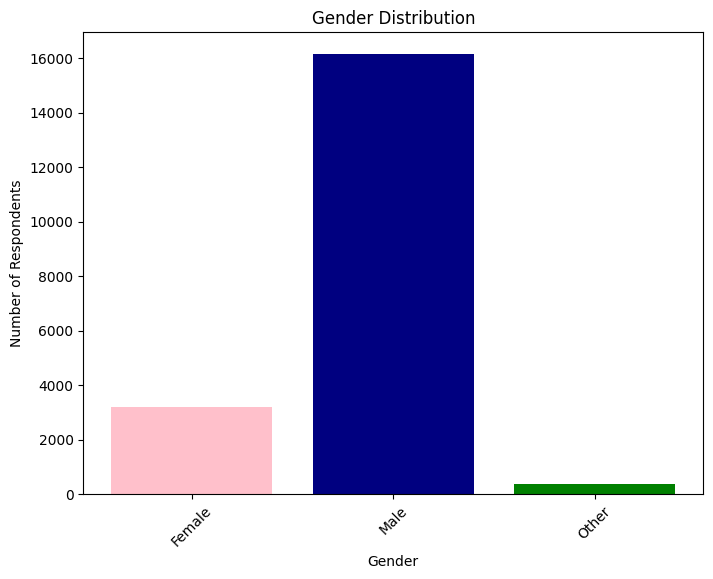

In [13]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(gender_distr['Gender'], gender_distr['Respondents'], color=['pink', 'navy', 'green'])

# Personalizar el gráfico
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.show()

In [14]:
# Gender Distribution
# Calcular el total de encuestados
total_respondents = gender_distr['Respondents'].sum()

# Calcular el porcentaje de encuestados de cada género
gender_distr['Percentage'] = (gender_distr['Respondents'] / total_respondents) * 100
gender_distr['Percentage'] = round(gender_distr['Percentage'], 2)

# Imprimir los resultados
print("Gender Distribution")
gender_distr


Gender Distribution


,Gender,Respondents,Percentage
0,Female,3212,16.29
1,Male,16138,81.85
2,Other,367,1.86


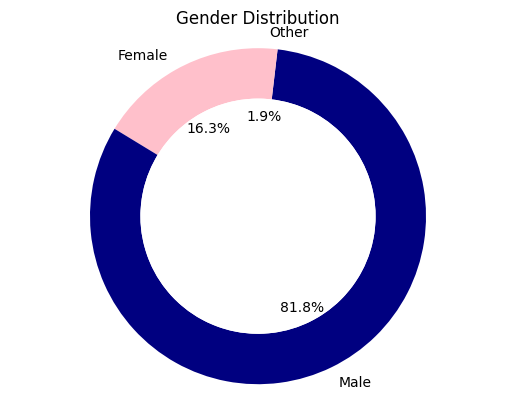

In [15]:
# Gender Distribution
# Crear el grafico de Donuts
labels = gender_distr['Gender']
sizes = gender_distr['Respondents']
colors = ['pink', 'navy', ]  # Colores para cada género

# Crear el gráfico de dona
fig, ax = plt.subplots()
ax.set_title('Gender Distribution')

# Crear el donut chart
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))

# Agregar un círculo blanco en el centro para crear el donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ajustar el aspecto para que sea un círculo
ax.axis('equal')

plt.show()

In [16]:
# Gender Distribution by Country
demographics = multiple_choice_responses[['Q1','Q2','Q3']].drop(multiple_choice_responses.index[0])
demographics = demographics[(demographics['Q2'] == 'Female') | (demographics['Q2'] == 'Male')]
demographics = demographics.rename(columns={'Q1':'Age_Group', 'Q2':'Gender', 'Q3':'Country'})

loc = pd.crosstab(demographics['Country'], demographics['Gender'])

# Convirtiendo las columnas 'Female' y 'Male' a tipo float
loc['Female'] = loc['Female'].astype(float)
loc['Male'] = loc['Male'].astype(float)
loc['Total'] = loc['Female'] + loc['Male']

loc_sorted = loc.sort_values(by='Total', ascending=False)

# Ordenando los valores por el número de mujeres (en orden descendente)
loc = loc.sort_values(by=['Female'], ascending=False)
loc.head(10)

Gender,Female,Male,Total
Country,,,
India,771.0,3958.0,4729.0
United States of America,624.0,2387.0,3011.0
Other,159.0,842.0,1001.0
Canada,99.0,334.0,433.0
Germany,91.0,432.0,523.0
United Kingdom of Great Britain and Northern Ireland,91.0,379.0,470.0
China,84.0,469.0,553.0
Brazil,79.0,643.0,722.0
Russia,77.0,543.0,620.0


In [17]:
# Gender Distribution by Country
# Calcular el total de encuestados por país
loc['Total'] = loc['Female'] + loc['Male']

# Calcular el porcentaje de encuestados de cada género en cada país
loc['Female_Percentage'] = (loc['Female'] / loc['Total']) * 100
loc['Male_Percentage'] = (loc['Male'] / loc['Total']) * 100

# Imprimir los resultados
print("Gender Distribution by Country")
# print(loc[['Female_Percentage', 'Male_Percentage']])

loc[['Female_Percentage', 'Male_Percentage']]

Gender Distribution by Country


Gender,Female_Percentage,Male_Percentage
Country,,
India,16.303658,83.696342
United States of America,20.724012,79.275988
Other,15.884116,84.115884
Canada,22.863741,77.136259
Germany,17.399618,82.600382
United Kingdom of Great Britain and Northern Ireland,19.361702,80.638298
China,15.189873,84.810127
Brazil,10.941828,89.058172
Russia,12.419355,87.580645


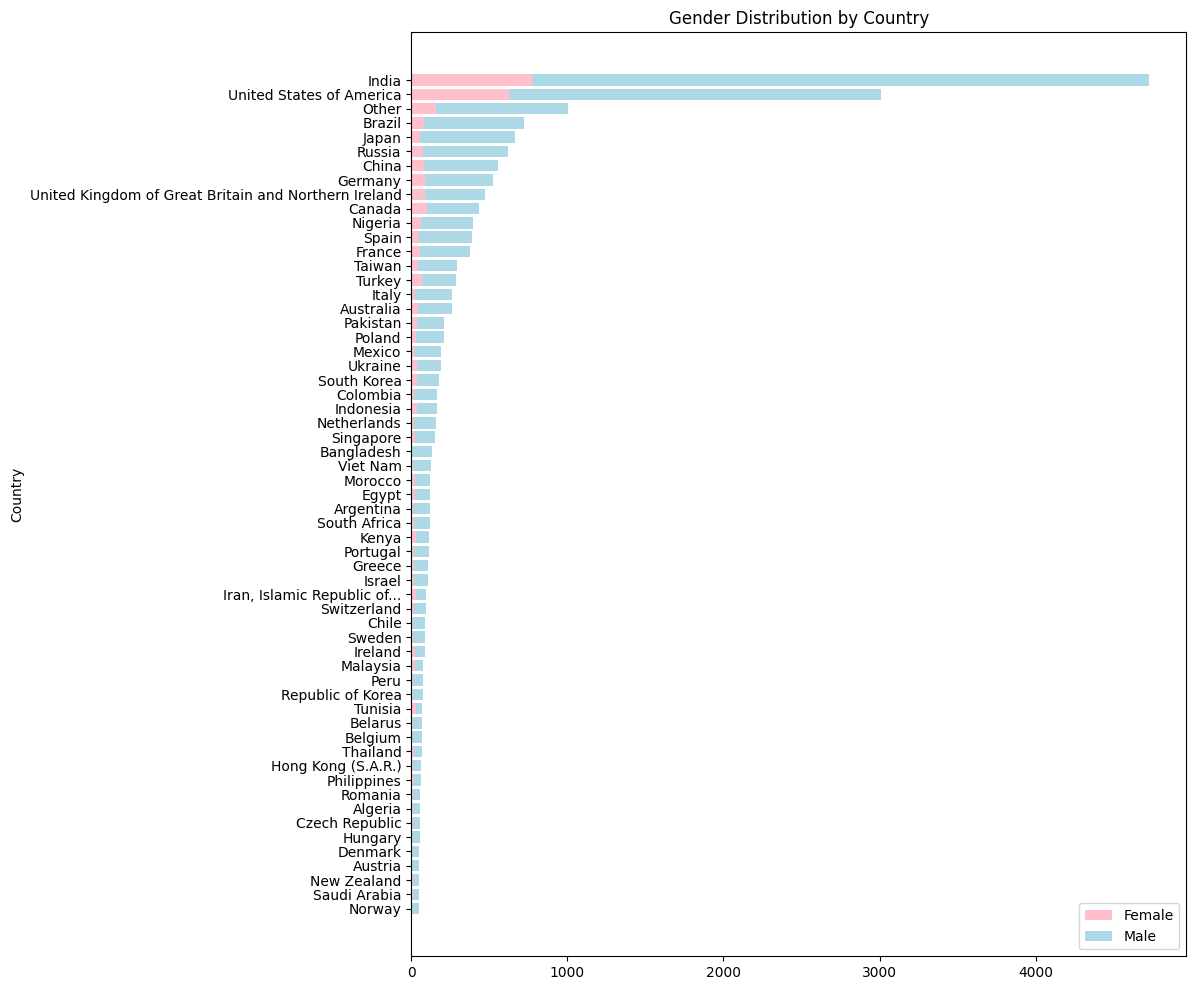

In [18]:
# Ordenar el DataFrame por el total de encuestados
loc_sorted = loc.sort_values(by='Total', ascending=True)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 12))

# Crear el gráfico de barras horizontal
ax.barh(loc_sorted.index, loc_sorted['Female'], color='pink', label='Female')
ax.barh(loc_sorted.index, loc_sorted['Male'], left=loc_sorted['Female'], color='lightblue', label='Male')

# Configurar etiquetas y título
# ax.set_xlabel('Percentage')
ax.set_ylabel('Country')
ax.set_title('Gender Distribution by Country')
ax.legend()

# Mostrar el gráfico
# plt.tight_layout()
plt.show()


In [20]:
# Female Respondents by Location (Percentage)
# Calculando el porcentaje de mujeres por ubicación
for i in loc.index:
    female = loc.at[i, 'Female']
    male = loc.at[i, 'Male']
    total = female + male
    loc.at[i, 'Female'] = round((female / total) * 100, 2)  # Calculando el porcentaje y redondeando a 2 decimales

# Eliminando la columna 'Male'
loc = loc.drop(['Male'], axis=1)

# Ordenando los valores por el porcentaje de mujeres (en orden descendente)
loc = loc.sort_values(by=['Female'], ascending=False)

# Imprimir los resultados
print("Female Respondents by Location (Percentage)")

# print(loc[['Female']])
#  loc[['Female']]

Female Respondents by Location (Percentage)


In [21]:
# Dividiendo el DataFrame en dos mitades
half_rows = len(loc) // 2

# Imprimiendo la mitad superior del DataFrame
print("Mitad Superior de los Porcentajes de Mujeres por Ubicación")
loc[['Female']].iloc[:half_rows]


Mitad Superior de los Porcentajes de Mujeres por Ubicación


Gender,Female
Country,
Tunisia,48.53
Philippines,31.67
"Iran, Islamic Republic of...",29.47
Malaysia,29.33
Kenya,25.44
Ireland,25.29
Turkey,23.24
Indonesia,23.03
Canada,22.86


In [22]:
# Imprimiendo la mitad inferior del DataFrame
print("\nMitad Inferior de los Porcentajes de Mujeres por Ubicación")
loc[['Female']].iloc[half_rows:]


Mitad Inferior de los Porcentajes de Mujeres por Ubicación


Gender,Female
Country,
Switzerland,15.96
Other,15.88
Israel,15.38
China,15.19
Republic of Korea,15.07
Poland,14.90
Sweden,14.77
Taiwan,14.38
France,14.06


In [23]:
# Gender Distribution by Age Group
# Crear el gráfico de barras horizontal para el porcentaje de mujeres
age = pd.crosstab(demographics['Age_Group'], demographics['Gender'])
age['Female'] = age['Female'].astype(float)
age['Male'] = age['Male'].astype(float)

totals = demographics.groupby('Age_Group').agg({'Gender':'count'})

demographics

,Age_Group,Gender,Country
1,22-24,Male,France
2,40-44,Male,India
3,55-59,Female,Germany
4,40-44,Male,Australia
5,22-24,Male,India
...,...,...,...
19713,50-54,Male,Japan
19714,18-21,Male,India
19715,35-39,Male,India
19716,25-29,Male,India


In [24]:
# Gender Distribution by Age Group - Age Group Distribution
# Mostrar los resultados en un DataFrame
results_df = pd.DataFrame({
    'Age_Group': totals.index,
    'Total_Gender': totals['Gender'],
    'Female_Respondents': age['Female'],
    'Male_Respondents': age['Male']
})

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

Resultados del gráfico en un DataFrame:


,Age_Group,Total_Gender,Female_Respondents,Male_Respondents
Age_Group,,,,
18-21,18-21,2468,419.0,2049.0
22-24,22-24,3558,678.0,2880.0
25-29,25-29,4372,810.0,3562.0
30-34,30-34,3065,513.0,2552.0
35-39,35-39,2047,304.0,1743.0
40-44,40-44,1410,209.0,1201.0
45-49,45-49,928,118.0,810.0
50-54,50-54,678,80.0,598.0
55-59,55-59,408,51.0,357.0


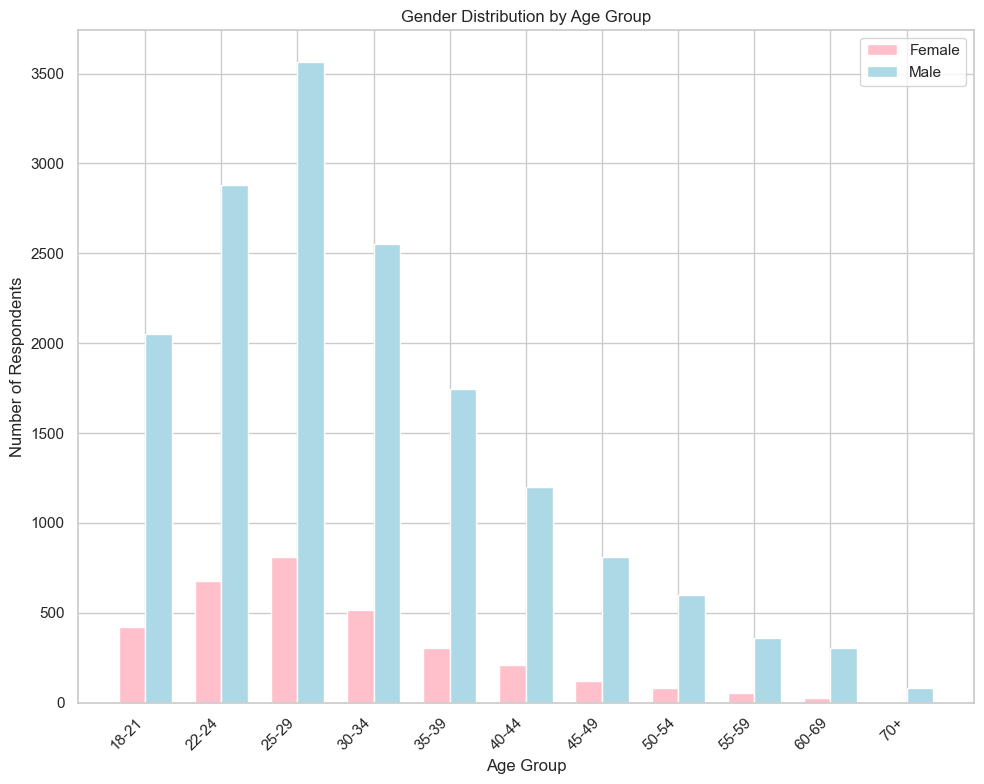

In [25]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8))

# Obtener los rangos de edades y la cantidad de encuestados por grupo de edad
age_groups = results_df['Age_Group']
total_gender = results_df['Total_Gender']
female_respondents = results_df['Female_Respondents']
male_respondents = results_df['Male_Respondents']

# Configurar la posición de las barras para cada grupo de edad
bar_width = 0.35
index = range(len(age_groups))

# Crear las barras para las mujeres
bar1 = ax.bar(index, female_respondents, bar_width, label='Female', color='pink')

# Crear las barras para los hombres
bar2 = ax.bar([i + bar_width for i in index], male_respondents, bar_width, label='Male', color='lightblue')

# Configurar etiquetas y título
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Respondents')
ax.set_title('Gender Distribution by Age Group')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(age_groups)
ax.legend()

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

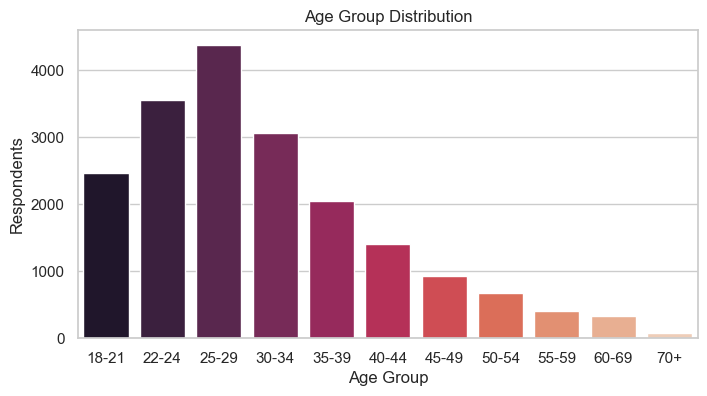

In [63]:
# Gender Distribution by Age Group - Age Group Distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Age Group Distribution')
ax.set(xlabel='Age Group', ylabel='Respondents')
sns.set(style='whitegrid')

# Modificar el gráfico para evitar la advertencia futura
sns.barplot(x=totals.index, y=totals['Gender'], hue=totals.index, palette="rocket", ax=ax, dodge=False)
#ax.legend_.remove()  # Quitar la leyenda si no se necesita

plt.show()

In [27]:
# Gender Distribution by Age Group - Female Respondents by Age Group (Percentage)
# Calcular los porcentajes de mujeres por grupo de edad
for i in age.index:
    female = age.at[i, 'Female']
    male = age.at[i, 'Male']
    total = female + male
    age.at[i, 'Female'] = round((female / total) * 100, 2)  # Convertir a porcentaje y redondear a 2 decimales

# Eliminar la columna 'Male' si deseas incluir solo el porcentaje de mujeres
age = age.drop(['Male'], axis=1)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Age_Group': age.index,
    'Female_Percentage': age['Female']
})

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

Resultados del gráfico en un DataFrame:


,Age_Group,Female_Percentage
Age_Group,,
18-21,18-21,16.98
22-24,22-24,19.06
25-29,25-29,18.53
30-34,30-34,16.74
35-39,35-39,14.85
40-44,40-44,14.82
45-49,45-49,12.72
50-54,50-54,11.80
55-59,55-59,12.50


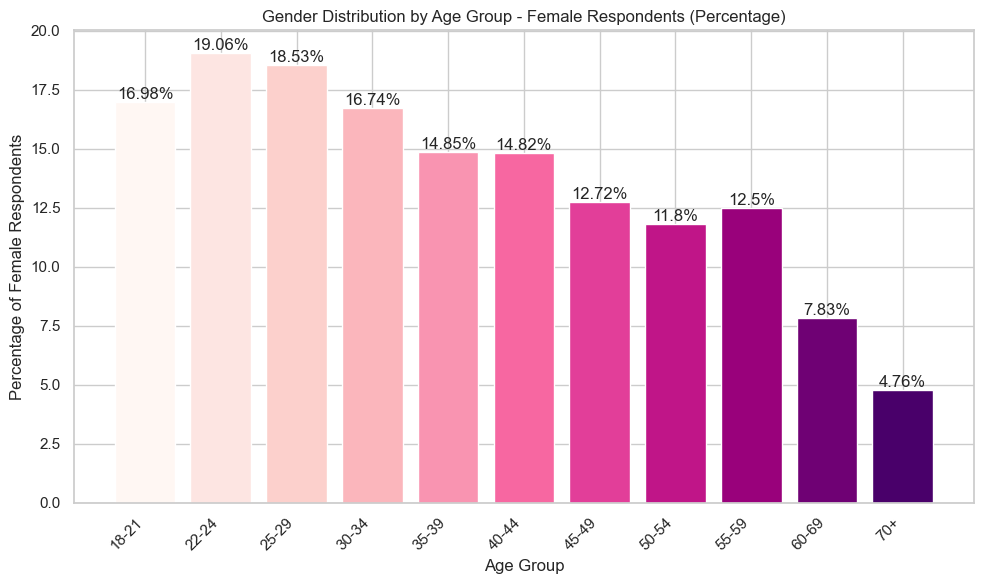

In [28]:
# Obtener los datos del DataFrame
age_groups = results_df['Age_Group']
female_percentages = results_df['Female_Percentage']

# color de las barras con una escala de colores rosados
colors = plt.cm.RdPu(np.linspace(0, 1, len(age_groups)))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(age_groups, female_percentages, color=colors)

# Configurar etiquetas y título
plt.xlabel('Age Group')
plt.ylabel('Percentage of Female Respondents')
plt.title('Gender Distribution by Age Group - Female Respondents (Percentage)')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de porcentaje en las barras
for bar, percentage in zip(bars, female_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage}%', 
             ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

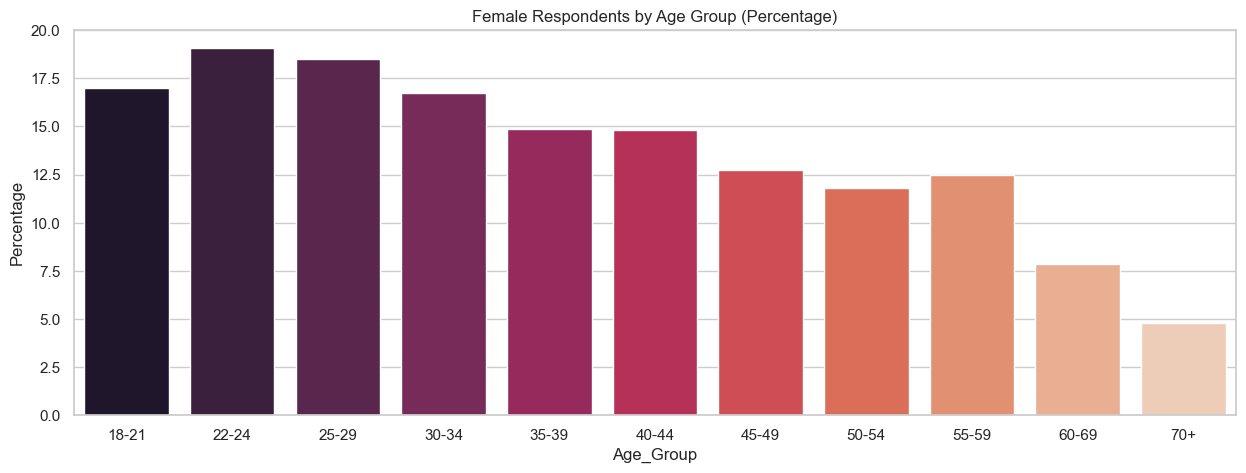

In [65]:
# Gender Distribution by Age Group - Female Respondents by Age Group (Percentage)
# Crear el gráfico de barras horizontal para el porcentaje de mujeres

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.set_title('Female Respondents by Age Group (Percentage)')
ax.set(ylabel='Percentage')
sns.set(style='whitegrid')

# Modificar el gráfico para evitar la advertencia futura
ax = sns.barplot(x=age.index, y=age['Female'], hue=age.index, palette="rocket", dodge=False)

plt.show()

In [30]:
# Career and Education
# Filtrar los datos solo para mujeres y hombres
women = multiple_choice_responses[multiple_choice_responses['Q2']=='Female'].copy()
men = multiple_choice_responses[multiple_choice_responses['Q2']=='Male'].copy()

# Agrupar por título de trabajo y contar el número de ocurrencias
jobs = women.groupby('Q5', as_index=False).agg({'Q1':'count'})
jobs = jobs.rename(columns={'Q1':'Count', 'Q5':'Job_Title'})
jobs = jobs.sort_values(by=['Count'], ascending = False)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Job_Title': jobs['Job_Title'],
    'Count': jobs['Count']
})

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

Resultados del gráfico en un DataFrame:


,Job_Title,Count
11,Student,764
4,Data Scientist,606
2,Data Analyst,347
9,Software Engineer,313
6,Other,258
8,Research Scientist,241
5,Not employed,214
0,Business Analyst,132
7,Product/Project Manager,83
3,Data Engineer,76


In [31]:
women

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
8,624,22-24,Female,-1,United States of America,Bachelor’s degree,Data Scientist,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
16,485,50-54,Female,-1,United States of America,Master’s degree,Data Analyst,-1,50-249 employees,1-2,...,Microsoft SQL Server,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
21,1529,22-24,Female,-1,Ireland,Master’s degree,Data Analyst,-1,"1000-9,999 employees",10-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
29,528,30-34,Female,-1,Ukraine,Doctoral degree,Research Scientist,-1,"1000-9,999 employees",3-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19678,95,30-34,Female,-1,Australia,Doctoral degree,Research Scientist,-1,"1000-9,999 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19692,290,30-34,Female,-1,India,Master’s degree,Data Scientist,-1,"> 10,000 employees",15-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19695,119,22-24,Female,-1,India,Bachelor’s degree,Software Engineer,-1,"> 10,000 employees",1-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19696,55,25-29,Female,-1,Japan,Bachelor’s degree,Software Engineer,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [32]:
# Agrupar por título de trabajo y género, y contar el número de ocurrencias
women_jobs = women.groupby(['Q5'], as_index=False).agg({'Q1': 'count'})
men_jobs = men.groupby(['Q5'], as_index=False).agg({'Q1': 'count'})

# Renombrar las columnas
women_jobs = women_jobs.rename(columns={'Q1': 'Count_Women', 'Q5': 'Job_Title'})
men_jobs = men_jobs.rename(columns={'Q1': 'Count_Men', 'Q5': 'Job_Title'})

# Fusionar los datos de hombres y mujeres en el DataFrame final
results_df = pd.merge(women_jobs, men_jobs, on='Job_Title', how='outer')

# Llenar los valores faltantes con 0
results_df = results_df.fillna(0)

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

Resultados del gráfico en un DataFrame:


,Job_Title,Count_Women,Count_Men
0,Business Analyst,132,634
1,DBA/Database Engineer,17,136
2,Data Analyst,347,1231
3,Data Engineer,76,534
4,Data Scientist,606,3431
5,Not employed,214,699
6,Other,258,1387
7,Product/Project Manager,83,627
8,Research Scientist,241,1198
9,Software Engineer,313,2338


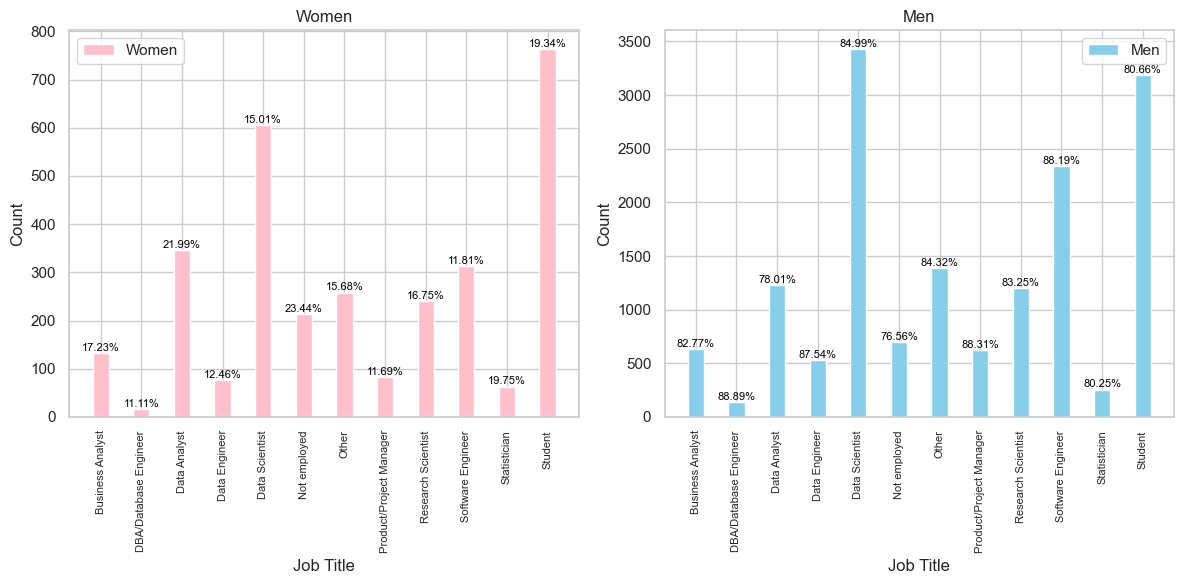

In [33]:
# Configurar los datos para el gráfico
index = range(len(results_df))  # Índices para los títulos de trabajo
categories = results_df['Job_Title']  # Categorías (títulos de trabajo)
Count_Women = results_df['Count_Women']  # Conteo de mujeres
Count_Men = results_df['Count_Men']  # Conteo de hombres
bar_width = 0.4  # Ancho de las barras
colors = {'Women': 'pink', 'Men': 'skyblue'}  # Colores para las barras

plt.figure(figsize=(12, 6))

# Subgráfico para mujeres
plt.subplot(1, 2, 1)
plt.bar(index, Count_Women, bar_width, color=colors['Women'], label='Women')
for i, w in enumerate(Count_Women):
    plt.text(i, w + 0.5, f"{(w / (w + Count_Men[i]) * 100):.2f}%", ha='center', va='bottom', color='black', fontsize=8)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Women')
plt.xticks(index, categories, rotation=90, fontsize=8)  # Tamaño del texto ajustado
plt.legend()

# Subgráfico para hombres
plt.subplot(1, 2, 2)
plt.bar(index, Count_Men, bar_width, color=colors['Men'], label='Men')
for i, m in enumerate(Count_Men):
    plt.text(i, m + 0.5, f"{(m / (Count_Women[i] + m) * 100):.2f}%", ha='center', va='bottom', color='black', fontsize=8)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Men')
plt.xticks(index, categories, rotation=90, fontsize=8)  
plt.legend()

plt.tight_layout()
plt.show()


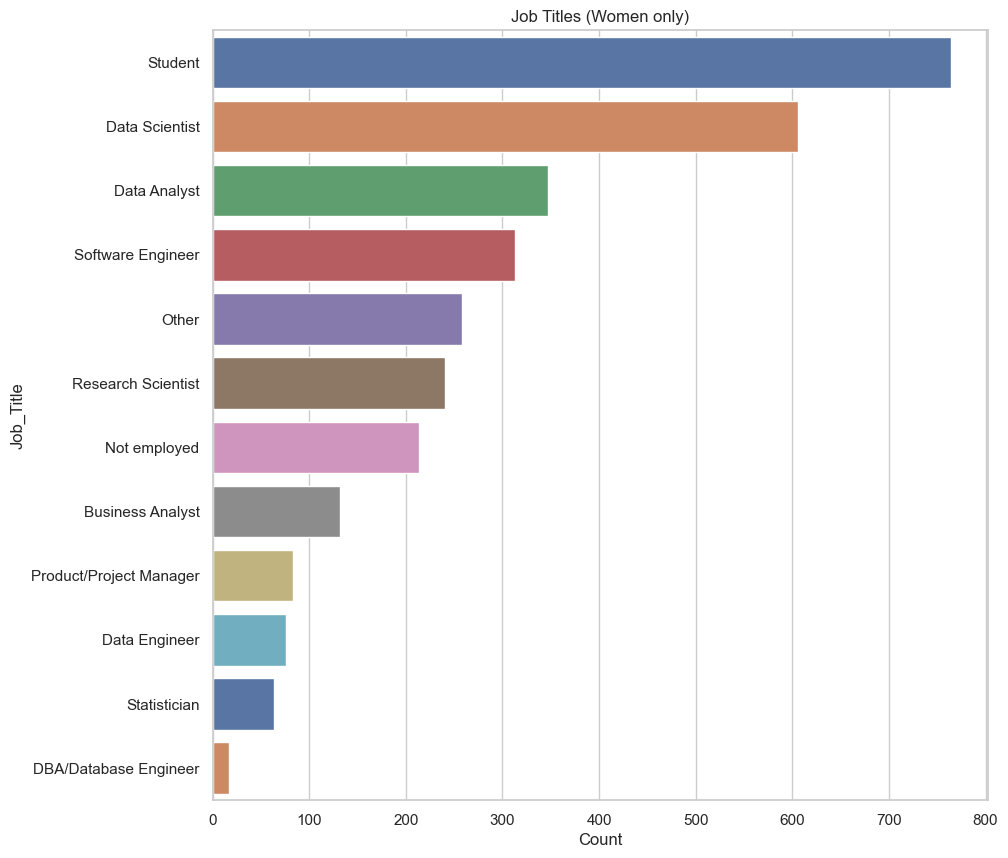

In [66]:
# Career and Education - Job Titles (Women only)
# Crear el gráfico 

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Job Titles (Women only)')
sns.set(style='whitegrid')

# Modificar el gráfico para evitar la advertencia futura
ax = sns.barplot(x='Count', y='Job_Title', hue='Job_Title', palette="deep", data=jobs, dodge=False)

plt.show()

In [35]:
# Career and Education - Job Fields (Women only)
# Lista de trabajos en STEM y no claros
stem = ['Data Scientist', 'Data Analyst', 'Software Engineer', 'Research Scientist', 
        'Data Engineer', 'DBA/Database Engineer', 'Statistician']
unclear = ['Business Analyst', 'Product/Project Manager']

jobs['Job_Field'] = [ 'STEM' if x in stem else 'Unclear' if x in unclear else x for x in jobs['Job_Title'] ]
field = jobs.groupby('Job_Field', as_index=False).agg({'Count':'sum'})
field = field.sort_values(by=['Count'], ascending=False)
field['Count'] = field['Count'].astype(float)

total = field['Count'].sum()

for i in field.index:
    count = field.at[i, 'Count']
    field.at[i, 'Count'] = round(count / total,4)

field = field.rename(columns={'Count':'Percentage'})

# Crear un DataFrame con los resultados
result_df = pd.DataFrame(field)

# Visualizar los resultados en un DataFrame
print("Resultados del porcentaje de trabajos por campo:")
result_df


Resultados del porcentaje de trabajos por campo:


,Job_Field,Percentage
2,STEM,0.5340
3,Student,0.2453
1,Other,0.0829
4,Unclear,0.0690
0,Not employed,0.0687


In [36]:
# Career and Education - Degrees
education = women.groupby('Q4', as_index = False).agg({'Q1':'count'})
education = men.groupby('Q4', as_index = False).agg({'Q1':'count'})
education = education.rename(columns={'Q1':'Count','Q4':'Education'}).sort_values(by=['Count'], ascending = False)
education.replace("Some college/university study without earning a bachelor’s degree", "Some college", inplace = True)
education.replace("No formal education past high school", "High School", inplace = True)
education.replace("I prefer not to answer", "No answer", inplace = True)


postgrad = ["Master’s degree", "Doctoral degree", "Professional degree"]
no_edu = ["Some college", "High School"]
education['Category'] = [ 'Postgrad' if x in postgrad else 'No Degree' if x in no_edu 
                         else 'Undergrad' if x == "Bachelor’s degree" else x for x in education['Education'] ]

edu_cat = education.groupby('Category', as_index = False).agg({'Count':'sum'})
edu_cat['Count'] = edu_cat['Count'].astype(float)
total = edu_cat['Count'].sum()

for i in edu_cat.index:
    count = edu_cat.at[i, 'Count']
    edu_cat.at[i, 'Count'] = round(count / total,4)
    
edu_cat = edu_cat.rename(columns={'Count':'Percentage'}).sort_values(by=['Percentage'], ascending = False)

# Visualizar los resultados en un DataFrame
print("Resultados de Education")
education

Resultados de Education


,Education,Count,Category
3,Master’s degree,6930,Postgrad
0,Bachelor’s degree,5049,Undergrad
1,Doctoral degree,2186,Postgrad
6,Some college,728,No Degree
5,Professional degree,496,Postgrad
2,No answer,236,No answer
4,High School,199,No Degree


In [69]:
# Career and Education - Degrees for Women
education_women = women.groupby('Q4', as_index=False).agg({'Q1':'count'})
education_women = education_women.rename(columns={'Q1':'Count', 'Q4':'Education'}).sort_values(by=['Count'], ascending=False)
education_women['Gender'] = 'Female'  # Agregar una columna 'Gender' con el valor 'Female' para todas las filas

# Career and Education - Degrees for Men
education_men = men.groupby('Q4', as_index=False).agg({'Q1':'count'})
education_men = education_men.rename(columns={'Q1':'Count', 'Q4':'Education'}).sort_values(by=['Count'], ascending=False)
education_men['Gender'] = 'Male'  # Agregar una columna 'Gender' con el valor 'Male' para todas las filas

# Combina los DataFrames de educación para mujeres y hombres
education_combined = pd.merge(education_women, education_men, on='Education', suffixes=('_women', '_men'), how='outer')
education_combined

,Education,Count_women,Gender_women,Count_men,Gender_men
0,Bachelor’s degree,865,Female,5049,Male
1,Doctoral degree,521,Female,2186,Male
2,I prefer not to answer,50,Female,236,Male
3,Master’s degree,1496,Female,6930,Male
4,No formal education past high school,26,Female,199,Male
5,Professional degree,103,Female,496,Male
6,Some college/university study without earning ...,87,Female,728,Male


In [68]:
# Renombra las columnas Count para distinguir entre mujeres y hombres
education_combined = education_combined.rename(columns={'Count_women':'Count_women', 'Count_men':'Count_men'})
education_combined.replace("Some college/university study without earning a bachelor’s degree", "Some college", inplace = True)
education_combined.replace("No formal education past high school", "High School", inplace = True)
education_combined.replace("I prefer not to answer", "No answer", inplace = True)

# Crea la columna 'Category' basada en el tipo de educación
postgrad = ["Master’s degree", "Doctoral degree", "Professional degree"]
no_edu = ["Some college", "High School"]
education_combined['Category'] = education_combined['Education'].apply(lambda x: 'Postgrad' if x in postgrad else 'No Degree' if x in no_edu else 'Undergrad')

# Reordena las columnas según el requisito
education_combined = education_combined[['Education', 'Count_women', 'Count_men', 'Category']]

# Visualizar los resultados en un DataFrame
print("Resultados de Education (Combined)")
education_combined

Resultados de Education (Combined)


,Education,Count_women,Count_men,Category
0,Bachelor’s degree,865,5049,Undergrad
1,Doctoral degree,521,2186,Postgrad
2,No answer,50,236,Undergrad
3,Master’s degree,1496,6930,Postgrad
4,High School,26,199,No Degree
5,Professional degree,103,496,Postgrad
6,Some college,87,728,No Degree


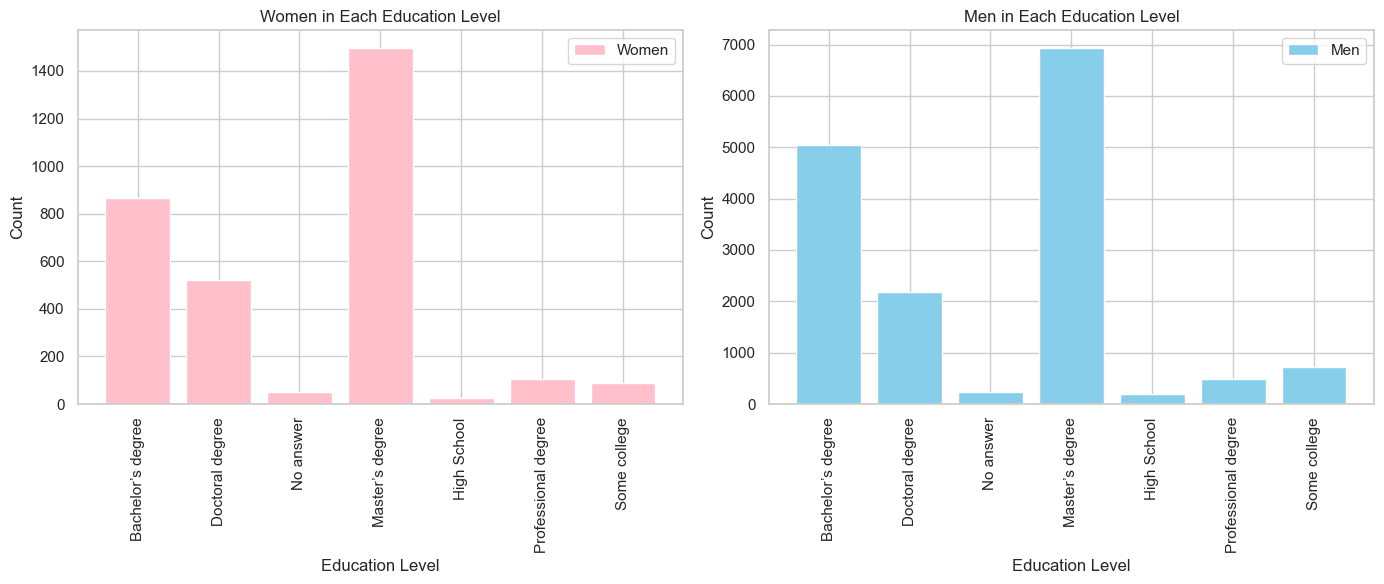

In [38]:
# Configurar los datos
education_levels = education_combined['Education']
count_women = education_combined['Count_women']
count_men = education_combined['Count_men']

# Crear la figura y los ejes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Grafico para mujeres
axs[0].bar(education_levels, count_women, color='pink', label='Women')
axs[0].set_title('Women in Each Education Level')
axs[0].set_xlabel('Education Level')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=90)
axs[0].legend()

# Grafico para hombres
axs[1].bar(education_levels, count_men, color='skyblue', label='Men')
axs[1].set_title('Men in Each Education Level')
axs[1].set_xlabel('Education Level')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=90)
axs[1].legend()

# Ajustar el diseño
plt.tight_layout()
plt.show()

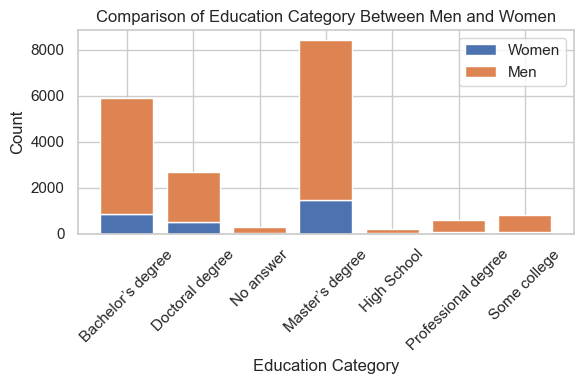

In [39]:
# Definir los datos
categories = education_combined['Education']
count_women = education_combined['Count_women']
count_men = education_combined['Count_men']

# Configurar el gráfico
plt.figure(figsize=(6, 4))

# Dibujar las barras para mujeres y hombres
plt.bar(categories, count_women, label='Women')
plt.bar(categories, count_men, bottom=count_women, label='Men')

# Configurar el eje y el título
plt.xlabel('Education Category')
plt.ylabel('Count')
plt.title('Comparison of Education Category Between Men and Women')
plt.xticks(rotation=45)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [40]:
print("Resultados Degree Categories")
edu_cat


Resultados Degree Categories


,Category,Percentage
2,Postgrad,0.6074
3,Undergrad,0.3191
0,No Degree,0.0586
1,No answer,0.0149


In [41]:
# Low Salaries: Occupation
low_salary_women = women[women['Q10']=='$0-999']
lows_women = low_salary_women.groupby('Q5', as_index = False).agg({'Q1':'count'})
lows_women = lows_women.rename(columns={'Q1':'Count', 'Q5':'Occupation'})
lows_women = lows_women.sort_values(by=['Count'], ascending = False)

# Low Salaries: Occupation
low_salary_men = men[men['Q10']=='$0-999']
lows_men = low_salary_men.groupby('Q5', as_index = False).agg({'Q1':'count'})
lows_men = lows_men.rename(columns={'Q1':'Count', 'Q5':'Occupation'})
lows_men = lows_men.sort_values(by=['Count'], ascending = False)

print("Low Salaries: Occupation")
lows_men

Low Salaries: Occupation


,Occupation,Count
4,Data Scientist,291
8,Software Engineer,266
2,Data Analyst,167
5,Other,140
7,Research Scientist,124
0,Business Analyst,59
3,Data Engineer,46
9,Statistician,36
6,Product/Project Manager,32
1,DBA/Database Engineer,9


In [42]:
# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

salaries_women = women.groupby('Q10', as_index = False).agg({'Q1':'count'})
salaries_women = salaries_women.rename(columns={'Q10':'Range', 'Q1':'Count'})

salaries_women['Range_Start'] = salaries_women.Range.apply(lambda x: find_number(x))

salaries_women = salaries_women.sort_values(by=['Range_Start'])
salaries_women = salaries_women[salaries_women['Range_Start'] != 0]


salaries_men = men.groupby('Q10', as_index = False).agg({'Q1':'count'})
salaries_men = salaries_men.rename(columns={'Q10':'Range', 'Q1':'Count'})

salaries_men['Range_Start'] = salaries_men.Range.apply(lambda x: find_number(x))

salaries_men = salaries_men.sort_values(by=['Range_Start'])
salaries_men = salaries_men[salaries_men['Range_Start'] != 0]

print("Low Salaries: Range")
salaries_men

Low Salaries: Range


,Range,Count,Range_Start
1,"1,000-1,999",470,1000
7,"2,000-2,999",316,2000
12,"3,000-3,999",250,3000
15,"4,000-4,999",229,4000
17,"5,000-7,499",445,5000
20,"7,500-9,999",354,7500
2,"10,000-14,999",702,10000
5,"15,000-19,999",446,15000
8,"20,000-24,999",457,20000
10,"25,000-29,999",411,25000


In [43]:
# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

# Salarios: Ocupación para mujeres
salaries_women = women.groupby('Q10', as_index=False).agg({'Q1':'count'})
salaries_women = salaries_women.rename(columns={'Q10':'Range', 'Q1':'Count'})

salaries_women['Range_Start'] = salaries_women.Range.apply(lambda x: find_number(x))

salaries_women = salaries_women.sort_values(by=['Range_Start'])
salaries_women = salaries_women[salaries_women['Range_Start'] != 0]

salaries_women = salaries_women.rename(columns={'Q1': 'Count', 'Q5': 'Occupation'})

salaries_women

,Range,Count,Range_Start
1,"1,000-1,999",118,1000
7,"2,000-2,999",69,2000
12,"3,000-3,999",50,3000
15,"4,000-4,999",56,4000
17,"5,000-7,499",84,5000
20,"7,500-9,999",50,7500
2,"10,000-14,999",118,10000
5,"15,000-19,999",76,15000
8,"20,000-24,999",63,20000
10,"25,000-29,999",64,25000


In [44]:
# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    elif 'na' in x:
        return -1  # Valor predeterminado para 'na'
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

# Salarios: Ocupación para mujeres
salaries_women = women[['Q10', 'Q5']]
salaries_women = salaries_women.rename(columns={'Q10':'Range', 'Q5':'Occupation'})
salaries_women['Count'] = 1

salaries_women['Range_Start'] = salaries_women['Range'].astype(str).apply(lambda x: find_number(x))

salaries_women = salaries_women.sort_values(by=['Range_Start'])
salaries_women = salaries_women[salaries_women['Range_Start'] != -1]  # Filtrar valores predeterminados

salaries_women.head()

,Range,Occupation,Count,Range_Start
14459,$0-999,Data Scientist,1,0
5796,$0-999,Data Scientist,1,0
10568,$0-999,Data Scientist,1,0
10585,$0-999,Other,1,0
338,$0-999,Business Analyst,1,0


In [45]:
# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    elif 'na' in x:
        return -1  # Valor predeterminado para 'na'
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

# Salarios: Ocupación para mujeres
salaries_women = women[['Q10', 'Q5']]
salaries_women = salaries_women.rename(columns={'Q10':'Range', 'Q5':'Occupation'})
salaries_women['Count'] = 1

salaries_women['Range_Start'] = salaries_women['Range'].astype(str).apply(lambda x: find_number(x))

salaries_women = salaries_women.sort_values(by=['Range_Start'])
salaries_women = salaries_women[salaries_women['Range_Start'] != -1]  # Filtrar valores predeterminados

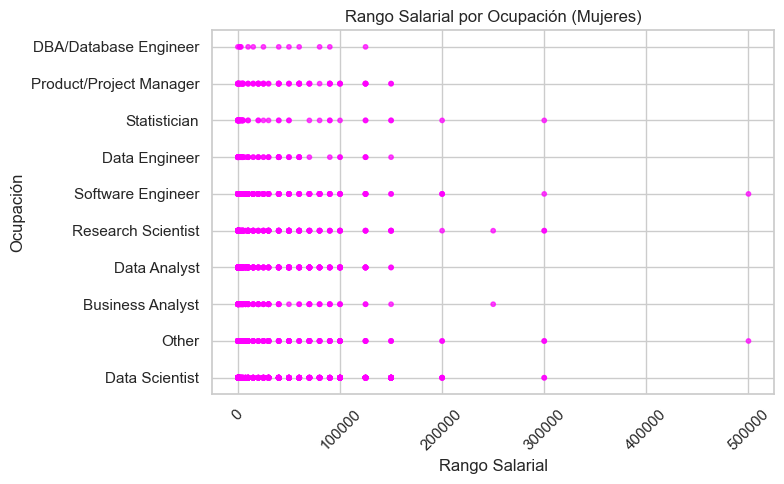

In [46]:
# Configuración del gráfico de dispersión
plt.figure(figsize=(8, 5))

# Gráfico de dispersión de ocupación y rango salarial
plt.scatter(salaries_women['Range_Start'], salaries_women['Occupation'], s=salaries_women['Count']*10, color='fuchsia', alpha=0.7)

# Etiquetas y título
plt.xlabel('Rango Salarial')
plt.ylabel('Ocupación')
plt.title('Rango Salarial por Ocupación (Mujeres)')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show() 


In [47]:
# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    elif 'na' in x:
        return -1  # Valor predeterminado para 'na'
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

# Salarios: Ocupación para hombres
salaries_men = men[['Q10', 'Q5']]
salaries_men = salaries_men.rename(columns={'Q10':'Range', 'Q5':'Occupation'})
salaries_men['Count'] = 1

salaries_men['Range_Start'] = salaries_men['Range'].astype(str).apply(lambda x: find_number(x))

salaries_men = salaries_men.sort_values(by=['Range_Start'])
salaries_men = salaries_men[salaries_men['Range_Start'] != -1]  # Filtrar valores predeterminados

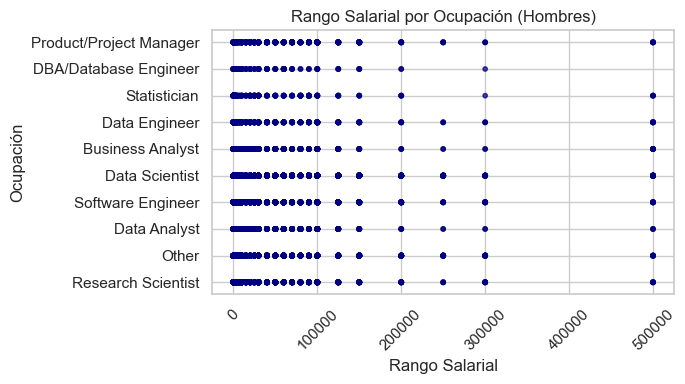

In [48]:
# Configuración del gráfico de dispersión
plt.figure(figsize=(7, 4))

# Gráfico de dispersión de ocupación y rango salarial
plt.scatter(salaries_men['Range_Start'], salaries_men['Occupation'], s=salaries_men['Count']*10, color='navy', alpha=0.7)

# Etiquetas y título
plt.xlabel('Rango Salarial')
plt.ylabel('Ocupación')
plt.title('Rango Salarial por Ocupación (Hombres)')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [49]:
# Función para convertir rangos de salario a valores numéricos
def convert_range_to_numeric(range_str):
    if isinstance(range_str, str):
        range_str = range_str.replace('$', '')  # Eliminar el símbolo de dólar
        if '-' in range_str:
            range_values = range_str.split('-')
            start = int(range_values[0].replace(',', ''))  # Eliminar comas
            end = int(range_values[1].replace(',', ''))  # Eliminar comas
            return round((start + end) / 2, 2)  # Redondear a 2 decimales
    return -1  # Valor predeterminado para rangos no válidos


# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    elif 'na' in x:
        return -1  # Valor predeterminado para 'na'
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

    
# Salarios: Ocupación para mujeres
salaries_women = women[['Q10', 'Q5']]
salaries_women = salaries_women.rename(columns={'Q10':'Range', 'Q5':'Occupation'})
salaries_women['Count'] = 1

salaries_women['Range_Start'] = salaries_women['Range'].astype(str).apply(lambda x: find_number(x))

salaries_women = salaries_women.sort_values(by=['Range_Start'])
salaries_women = salaries_women[salaries_women['Range_Start'] != -1]  # Filtrar valores predeterminados

# Aplicar la función para convertir rangos a valores numéricos
salaries_women['Range_Start'] = salaries_women['Range'].apply(convert_range_to_numeric)

# Filtrar valores no válidos
salaries_women = salaries_women[salaries_women['Range_Start'] != -1]

# Agrupación por ocupación y cálculo del salario promedio
average_salary_women = salaries_women.groupby('Occupation')['Range_Start'].mean().reset_index()

# Visualización de los resultados
average_salary_women['Range_Start'] = average_salary_women['Range_Start'].round(2)
print(average_salary_women)

                Occupation  Range_Start
0         Business Analyst     29288.29
1    DBA/Database Engineer     42230.27
2             Data Analyst     32104.29
3            Data Engineer     32480.84
4           Data Scientist     55440.04
5                    Other     39116.88
6  Product/Project Manager     48093.66
7       Research Scientist     40094.98
8        Software Engineer     30422.05
9             Statistician     43910.97


In [50]:
# Función para convertir rangos de salario a valores numéricos
def convert_range_to_numeric(range_str):
    if isinstance(range_str, str):
        range_str = range_str.replace('$', '')  
        if '-' in range_str:
            range_values = range_str.split('-')
            start = int(range_values[0].replace(',', ''))
            end = int(range_values[1].replace(',', ''))  
            return round((start + end) / 2, 2)  # Redondear a 2 decimales
    return -1  # Valor predeterminado para rangos no válidos

In [51]:
# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    elif 'na' in x:
        return -1  # Valor predeterminado para 'na'
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

In [52]:
# Salarios: Ocupación para mujeres
salaries_women = women[['Q10', 'Q5']]
salaries_women = salaries_women.rename(columns={'Q10':'Range', 'Q5':'Occupation'})
salaries_women['Count'] = 1

salaries_women['Range_Start'] = salaries_women['Range'].astype(str).apply(lambda x: find_number(x))

salaries_women = salaries_women.sort_values(by=['Range_Start'])
salaries_women = salaries_women[salaries_women['Range_Start'] != -1]  # Filtrar valores predeterminados

In [53]:
# Aplicar la función para convertir rangos a valores numéricos
salaries_women['Range_Start'] = salaries_women['Range'].apply(convert_range_to_numeric)

# Filtrar valores no válidos
salaries_women = salaries_women[salaries_women['Range_Start'] != -1]

# Agrupación por ocupación y cálculo del salario promedio
average_salary_women = salaries_women.groupby('Occupation')['Range_Start'].mean().reset_index()
average_salary_women['Range_Start'] = average_salary_women['Range_Start'].round(2)

In [54]:
# Salarios: Ocupación para hombres
salaries_men = men[['Q10', 'Q5']]
salaries_men = salaries_men.rename(columns={'Q10':'Range', 'Q5':'Occupation'})
salaries_men['Count'] = 1

salaries_men['Range_Start'] = salaries_men['Range'].astype(str).apply(lambda x: find_number(x))

salaries_men = salaries_men.sort_values(by=['Range_Start'])
salaries_men = salaries_men[salaries_men['Range_Start'] != -1]  # Filtrar valores predeterminados

# Aplicar la función para convertir rangos a valores numéricos
salaries_men['Range_Start'] = salaries_men['Range'].apply(convert_range_to_numeric)

# Filtrar valores no válidos
salaries_men = salaries_men[salaries_men['Range_Start'] != -1]

In [55]:
# Agrupación por ocupación y cálculo del salario promedio
average_salary_men = salaries_men.groupby('Occupation')['Range_Start'].mean().reset_index()
average_salary_men['Range_Start'] = average_salary_men['Range_Start'].round(2)

# Unir los promedios de salarios de hombres y mujeres
average_salary_combined = average_salary_women.merge(average_salary_men, on='Occupation', suffixes=('_women', '_men'))

average_salary_combined

,Occupation,Range_Start_women,Range_Start_men
0,Business Analyst,29288.29,40594.05
1,DBA/Database Engineer,42230.27,48832.84
2,Data Analyst,32104.29,35264.37
3,Data Engineer,32480.84,50386.65
4,Data Scientist,55440.04,59289.54
5,Other,39116.88,57462.01
6,Product/Project Manager,48093.66,66221.14
7,Research Scientist,40094.98,48845.81
8,Software Engineer,30422.05,41534.98
9,Statistician,43910.97,43515.05


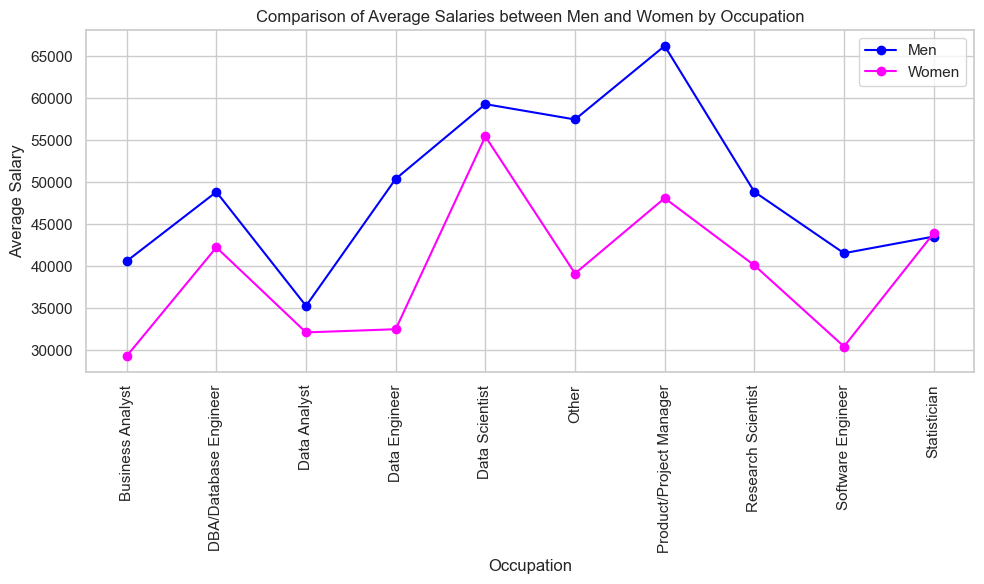

In [56]:
import matplotlib.pyplot as plt

# Plotting average salaries for men and women by occupation
plt.figure(figsize=(10, 6))

plt.plot(average_salary_combined['Occupation'], 
         average_salary_combined['Range_Start_men'], 
         marker='o', color='blue', label='Men')

plt.plot(average_salary_combined['Occupation'], 
         average_salary_combined['Range_Start_women'], 
         marker='o', color='fuchsia', label='Women')

plt.title('Comparison of Average Salaries between Men and Women by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


# Machine Learning Implementation and Evaluation